In [323]:
from toxic_comment_collection import get_dataset
get_dataset('zampieri2019')

In [324]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import emoji
import re

In [325]:
# Import Dataset
df = pd.read_csv("./files/zampieri2019/zampieri2019en.csv", sep="\t")
df.head()

,id,text,labels
0,0,@USER She should ask a few native Americans wh...,['offensive']
1,1,@USER @USER Go home you’re drunk!!! @USER #MAG...,['offensive']
2,2,Amazon is investigating Chinese employees who ...,['none']
3,3,"@USER Someone should'veTaken"" this piece of sh...",['offensive']
4,4,@USER @USER Obama wanted liberals &amp; illega...,['none']


In [326]:
df['labels'].value_counts()

['none']         8840
['offensive']    4400
Name: labels, dtype: int64

In [327]:
len(df)

13240

In [328]:
# Identify null rows or zero in the dataset

df[df.isnull().any(axis=1)]
df.loc[(df==0).any(axis=1)]

,id,text,labels
0,0,@USER She should ask a few native Americans wh...,['offensive']


In [329]:
# Create new labels in the cleaned_dataset colunm

cleaned_dataset=['too risky', 'non risky']

for i in range(len(cleaned_data)):
    if cleaned_data[i]=='offensive':
        cleaned_data[i]='too risky'
    if cleaned_data[i]=="none":
        cleaned_data[i]= 'non risky'
print(cleaned_data)

0        too risky
1        too risky
2         ['none']
3        too risky
4         ['none']
           ...    
13235    too risky
13236     ['none']
13237    too risky
13238    too risky
13239     ['none']
Name: labels, Length: 13240, dtype: object


In [330]:
df['new_labels'] = df['labels'].replace({"['offensive']":'too risky', "['none']" : "non risky"})
df.head()

,id,text,labels,new_labels
0,0,@USER She should ask a few native Americans wh...,['offensive'],too risky
1,1,@USER @USER Go home you’re drunk!!! @USER #MAG...,['offensive'],too risky
2,2,Amazon is investigating Chinese employees who ...,['none'],non risky
3,3,"@USER Someone should'veTaken"" this piece of sh...",['offensive'],too risky
4,4,@USER @USER Obama wanted liberals &amp; illega...,['none'],non risky


In [331]:
#convert labels into numerical format as 
df['numeric_labels'] = df['new_labels'].replace({"non risky":'0',"too risky":'2'})
df.head()

,id,text,labels,new_labels,numeric_labels
0,0,@USER She should ask a few native Americans wh...,['offensive'],too risky,2
1,1,@USER @USER Go home you’re drunk!!! @USER #MAG...,['offensive'],too risky,2
2,2,Amazon is investigating Chinese employees who ...,['none'],non risky,0
3,3,"@USER Someone should'veTaken"" this piece of sh...",['offensive'],too risky,2
4,4,@USER @USER Obama wanted liberals &amp; illega...,['none'],non risky,0


Cleaning Sentence


In [332]:
print(f"how many missing value in the dataset {df.isnull().any().sum()}")

how many missing value in the dataset 0


In [333]:
def clean_text(text):

    text = re.sub('\d+','', text)
    text = re.sub('&amp;',' ',text)
    text = re.sub('URL',' ',text)
    text = re.sub('[^a-zA-Z]+', ' ', text)
    text = re.sub('/(\s\s\s*)/g', ' ',text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('USER','',text)
    return text

In [334]:
df['cleaned_texts'] = df['text'].apply(clean_text)
df.head()

,id,text,labels,new_labels,numeric_labels,cleaned_texts
0,0,@USER She should ask a few native Americans wh...,['offensive'],too risky,2,She should ask a few native Americans what t...
1,1,@USER @USER Go home you’re drunk!!! @USER #MAG...,['offensive'],too risky,2,Go home you re drunk MAGA Trump
2,2,Amazon is investigating Chinese employees who ...,['none'],non risky,0,Amazon is investigating Chinese employees who ...
3,3,"@USER Someone should'veTaken"" this piece of sh...",['offensive'],too risky,2,Someone should veTaken this piece of shit to...
4,4,@USER @USER Obama wanted liberals &amp; illega...,['none'],non risky,0,Obama wanted liberals illegals to move into...


In [335]:
#instantiate lemmatizer
lemmatizer = WordNetLemmatizer()

In [336]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/naveenkhajuria/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/naveenkhajuria/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [337]:
#select only the cleaned_texts column
texts = df['cleaned_texts']
#convert to dataframe
texts = pd.DataFrame(texts)
#create empty list to hold the final output
corpus = []
#loop through each row of comments
for i in range(0, len(texts)):
    #tokenize the text
    review = texts['cleaned_texts'][i].split()
    #remove stopwords and lemmatize
    text_stopwords_lemmatized = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    #combine the tokenized texts
    text_stopwords_lemmatized = ' '.join(text_stopwords_lemmatized)
    #put final result into the corpus list
    corpus.append(text_stopwords_lemmatized)

In [338]:
#create dataframe with the appropriate name as accoridng to repo guidelines
corpus = pd.DataFrame(corpus, columns=['clean_sentence_training'])

In [339]:
#merge the main dataframe with the cleaned one
df = pd.concat([df, corpus], axis=1)

In [340]:
#function to check for emojis
def extract_emojis(s):
    """Checks if there are any emojis present

    Args:
        s (pandas series): column containing the texts
    Returns:
        result (list) : list containing emoji values if present, if not, empty string
    """    
    result= ''.join(c for c in s if c in emoji.EMOJI_DATA)
    return result

In [341]:
extract_emojis(df['text'])

''

In [342]:
#rename columns to match the appropriate format requested in the repo
df = df.rename(columns={'cleaned_texts':'raw_sentence','numeric_labels':'label'})
df['corpus_name'] = 'zampieri2019: Offensive Posts in Social Media'
df['clean_sentence_EDA'] = df['clean_sentence_training']


In [343]:
#select only relevant columns
df = df[['corpus_name','raw_sentence','label','clean_sentence_training','clean_sentence_EDA']]

In [344]:
df.to_csv("zampieri2019_offensive_Posts_in_Social_Media.csv")

In [379]:
from wordcloud import WordCloud
from collections import Counter
from matplotlib import pyplot as plt
from yellowbrick.text import FreqDistVisualizer
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns


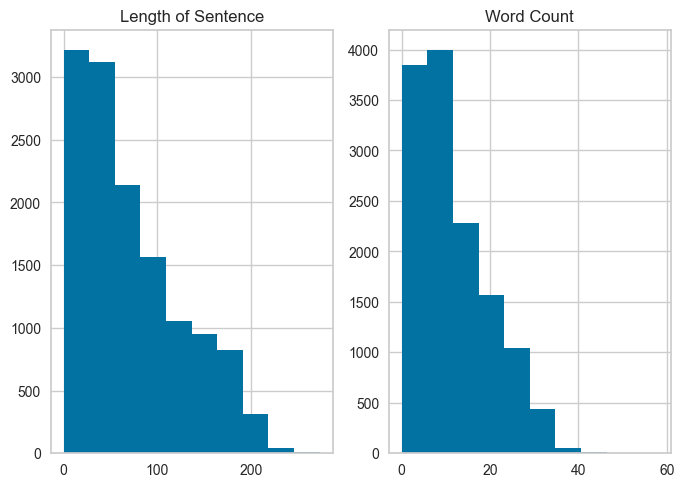

In [446]:
# Length of sentence shown by Histograph
data = df['clean_sentence_EDA']
counts = []
# count words to gain insights
for sentence in df['clean_sentence_EDA']:
    sentence = word_tokenize(str(sentence))
    word_count = len(sentence)
    counts.append(word_count)

fig, axes = plt.subplots(1, 2)
data.str.len().hist(ax=axes[0]).set_title('Length of Sentence')
plt.title('Word Count')
plt.hist(counts)
plt.show()



In [459]:
## Text Metrix A. total_num_words, B.average_word_length, C.average_sentence_length

total_num_words= sum(counts)
average_sentence_length= np.mean(counts)

word_length=[]
for sentence in df['clean_sentence_EDA']:
    sentence= word_tokenize(str(sentence))
    for word in sentence:
        length=len(word)
        word_length.append(length)
average_word_length=np.mean(word_length)

print(f'Total number of words in the dataset: {total_num_words} words.')
print(f'Average length of sentences in the dataset: {average_sentence_length} words.')
print(f'Average length of words in the sentence: {average_word_length} characters')






Total number of words in the dataset: 153242 words.
Average length of sentences in the dataset: 11.57416918429003 words.
Average length of words in the sentence: 5.358433066652745 characters


In [ ]:
# Most frequent words before and after data processing/cleaning


In [ ]:
# 20 Most frequent words by a. entire dataset, b. by each label type

In [ ]:
# Label balance- Pie Chart

In [ ]:
# Word Cloud

In [349]:
df.head(2)

,corpus_name,raw_sentence,label,clean_sentence_training,clean_sentence_EDA
0,zampieri2019: Offensive Posts in Social Media,She should ask a few native Americans what t...,2,She ask native Americans take,She ask native Americans take
1,zampieri2019: Offensive Posts in Social Media,Go home you re drunk MAGA Trump,2,Go home drunk MAGA Trump,Go home drunk MAGA Trump


In [346]:
df.shape

(13240, 5)

# Text Statistics

We will analyze the following data:

1. What are the most frequent words in the dataset by labels? [Bar chart]
2. Prepare a table of basic statistics [table]:
    a.Average length of the word
    b.Average number of words in the sentences
    c.Total words in the dataset
1. 20 most common words based [word cloud]
2. 20 most common words based on TF-IDF
3. Overview of the label categories [bar chart]



In [373]:
nltk.download('punkt')

all_words = []

for sentence in df['clean_sentence_EDA']:
    words = word_tokenize(str(sentence))
    for word in words:
        all_words.append(word)
print(all_words[:100])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/naveenkhajuria/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['She', 'ask', 'native', 'Americans', 'take', 'Go', 'home', 'drunk', 'MAGA', 'Trump', 'Amazon', 'investigating', 'Chinese', 'employee', 'selling', 'internal', 'data', 'third', 'party', 'seller', 'looking', 'edge', 'competitive', 'marketplace', 'Amazon', 'MAGA', 'KAG', 'CHINA', 'TCOT', 'Someone', 'veTaken', 'piece', 'shit', 'volcano', 'Obama', 'wanted', 'liberal', 'illegals', 'move', 'red', 'state', 'Liberals', 'Kookoo', 'Oh', 'no', 'Tough', 'shit', 'literally', 'talking', 'lol', 'mass', 'shooting', 'like', 'set', 'ups', 'propaganda', 'used', 'divide', 'u', 'major', 'issue', 'like', 'gun', 'control', 'terrorism', 'Buy', 'icecream', 'Canada', 'need', 'another', 'CUCK', 'We', 'already', 'enough', 'LooneyLeft', 'Liberals', 'f', 'king', 'great', 'country', 'Qproofs', 'TrudeauMustGo', 'It', 'fault', 'support', 'gun', 'control', 'What', 'difference', 'Kavanaugh', 'One', 'men', 'admitted', 'groping', 'year', 'old', 'girl', 'year', 'ago', 'The']


In [364]:
# let us find the 20 most common words now

most_common = Counter(all_words).most_common(20)
print(most_common)

[('I', 3476), ('gun', 1300), ('You', 1255), ('He', 1169), ('control', 1124), ('liberal', 1057), ('like', 1055), ('She', 941), ('MAGA', 923), ('The', 847), ('people', 835), ('know', 705), ('conservative', 669), ('get', 659), ('one', 634), ('It', 626), ('Antifa', 625), ('think', 600), ('Trump', 568), ('right', 538)]


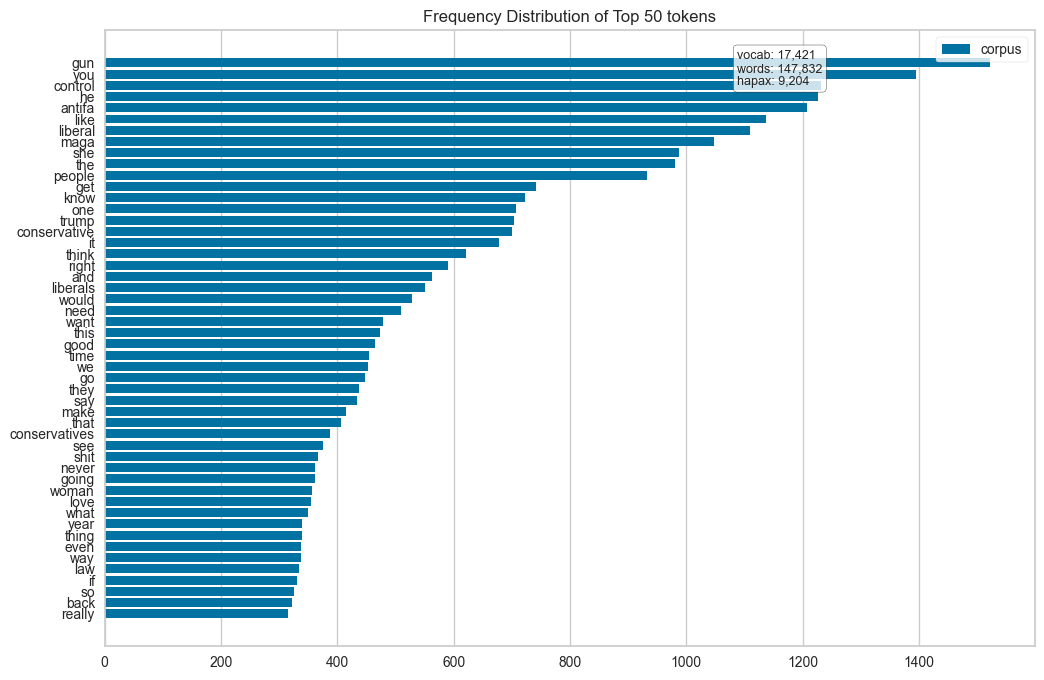

<AxesSubplot: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [378]:
# Visualize Token Frequency Distribution After Text Preprocessing
# The distribution because it tells us how the total number of word tokens in the text are distributed across the vocabulary items.visualizer plots a bar chart of the top 50 most frequent terms in the corpus, with the terms listed along the x-axis and frequency counts depicted at y-axis values. 


vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(df['clean_sentence_EDA'])
features   = vectorizer.get_feature_names_out()
plt.figure(figsize=(12,8))
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
for label in visualizer.ax.texts:
    label.set_size(20)
visualizer.poof()